<a href="https://colab.research.google.com/github/heesukjang/W210-Capstone---Waste-Sorting/blob/main/WasteSorting_FeatureExtraction_CNN_Heesuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [12]:
# #@title
# %%time
# %%capture

# ### Installing any uninstalled dependencies for the Python kernel
# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install opencv-python
# !{sys.executable} -m pip install rembg
# !{sys.executable} -m pip install scikit-image
# !{sys.executable} -m pip install scikit-learn
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn

In [13]:
# # write .py file with the print content
# %%writefile test_heesuk.py
# print('hello')

In [14]:
# # read the same .py file in python3
# !python3 test_heesuk.py

In [15]:
!pip install pillow_heif rembg

In [16]:
#@title
%%time
### Imports

import numpy as np
import matplotlib.pyplot as plt
import skimage.feature as feature
import cv2
import os
import matplotlib.image as mpimg
from skimage.util import img_as_ubyte
from rembg import remove
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA
from skimage.feature import hog
from scipy.ndimage import convolve
from scipy import signal
import pandas as pd
from sklearn.cluster import DBSCAN
import copy
import seaborn as sns

from skimage.feature import hog
from scipy.ndimage import convolve
from scipy import signal

from sklearn.manifold import TSNE
from skimage.filters import prewitt_h, prewitt_v
from skimage import filters
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageFilter
from scipy.cluster.vq import kmeans
from scipy.cluster.vq import vq
from scipy.cluster.vq import whiten
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import ast
import glob

CPU times: user 195 µs, sys: 0 ns, total: 195 µs
Wall time: 198 µs


In [17]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [18]:
# !pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu

In [19]:
#@title
%%time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.utils import layer_utils
# from keras.utils.layer_utils import count_params
# from tensorflow.keras.utils import count_params
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Multiply
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import SeparableConv1D
from tensorflow.keras.layers import SeparableConv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

CPU times: user 40 µs, sys: 3 µs, total: 43 µs
Wall time: 59.6 µs


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.preprocessing import image
from PIL import Image
from collections import Counter

# !pip install pillow_heif
from pillow_heif import register_heif_opener

# Register the HEIF opener
register_heif_opener()

# #@title
# %%time
# Hide warnings for final output
import warnings

warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Ensure to Add Shortcut of "MIDS_Capstone" folder to MyDrive from "Shared with me" first to be able to load images to your Colab notebook:
1. Right click on the "MIDS_Capstone" folder
2. Select "Organize" => "Add Shortcut" => Select "MyDrive"

In [21]:
# # # find # of files

# drinkingwaste_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/rawimgs/'
# drinkingwaste_folders = os.listdir(drinkingwaste_path)
# print(f'drinkingwaste_folders = {drinkingwaste_folders}')

# if '.DS_Store' in drinkingwaste_folders:
#     drinkingwaste_folders.remove('.DS_Store')

# df_dw = pd.DataFrame(columns = drinkingwaste_folders)

# for f in drinkingwaste_folders:
#   folder_path = os.path.join(drinkingwaste_path, f)

#   if os.path.isdir(folder_path):
#     print(f'folder_path = {folder_path}')
#     print(f'f = {f}')
#     files_in_folder = os.listdir(folder_path)
#     print(f'files_in_folder = {files_in_folder}')
#     num_files = len(files_in_folder)

#     df_dw.loc[0, f] = num_files


# print(df_dw)


# # dringkingwaste_pet_images = img2np(path = drinkingwaste_pet_path, list_of_filename = os.listdir(drinkingwaste_pet_path))

In [22]:

# def count_imgs_in_each_class(folder_name):
#   trashbox_train_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_dataset_subfolders/'
#   # drinkingwaste_path = '/content/drive/MyDrive/MIDS Capstone/Datasets/rawimgs/'
#   trashbox_train_subfolders = os.listdir(trashbox_train_path + folder_name)
#   # print(f'trashbox_train_subfolders = {trashbox_train_subfolders}')

#   df_dw = pd.DataFrame(columns = trashbox_train_subfolders)

#   # if '.DS_Store' in trashbox_train_path:
#   #     trashbox_train_path.remove('.DS_Store')
#   # if '.DS_Store' in trashbox_train_subfolders:
#   #     trashbox_train_subfolders.remove('.DS_Store')

#   if folder_name == 'glass' or folder_name == 'cardboard':
#     print(f'Count of "{folder_name}" images = {len(trashbox_train_subfolders)}')
#     print('==========================================')
#     # df_dw.loc[0, folder_name] = num_files
#   # if 'glass' not in trashbox_train_subfolders and 'cardboard' not in trashbox_train_subfolders:

#   else:
#     # if '.DS_Store' in trashbox_train_subfolders:
#     #   trashbox_train_subfolders.remove('.DS_Store')

#     print(f'Count of "{folder_name}" images:\n')
#     for f in trashbox_train_subfolders:
#       print(f'f = {f}')

#       folder_path = os.path.join(trashbox_train_path, f)
#       print(f'folder_path = {folder_path}')

#       if os.path.isdir(folder_path):
#         # print(f)
#         files_in_folder = os.listdir(folder_path)
#         num_files = len(files_in_folder)
#         # print(f'Count of {f} images:\n')
#         df_dw.loc[0, f] = num_files


#     print(df_dw)
#     print('==========================================')

# count_imgs_in_each_class('plastic')
# count_imgs_in_each_class('paper')
# count_imgs_in_each_class('metal')
# count_imgs_in_each_class('medical')
# count_imgs_in_each_class('glass')
# count_imgs_in_each_class('e-waste')
# count_imgs_in_each_class('cardboard')

In [23]:
#@title
%%time

trashbox_train_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/'
label_dict = {0: "plastic",
              1: "paper",
              2: "metal",
              3: "medical",
              4: "glass",
              5: "e-waste",
              6: "cardboard"
             }

label_list = ["Plastic", "Paper", "Metal", "Medical", "Glass", "E-Waste", "Cardboard"]

plastic_image_dir_path = trashbox_train_path + 'plastic'
paper_image_dir_path = trashbox_train_path + 'paper'
metal_image_dir_path = trashbox_train_path + 'metal'
medical_image_dir_path = trashbox_train_path + 'medical'
glass_image_dir_path = trashbox_train_path + 'glass'
e_waste_image_dir_path = trashbox_train_path + 'e-waste'
cardboard_image_dir_path = trashbox_train_path + 'cardboard'

processed_image_path_list = [plastic_image_dir_path,
                              paper_image_dir_path,
                              metal_image_dir_path,
                              medical_image_dir_path,
                              glass_image_dir_path,
                              e_waste_image_dir_path,
                              cardboard_image_dir_path
                            ]
print(f'len of chars in the path = {len(processed_image_path_list[0])}, {processed_image_path_list[0]}')

len of chars in the path = 72, /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/plastic
CPU times: user 1.75 ms, sys: 20 µs, total: 1.77 ms
Wall time: 6.95 ms


### Create New Folders to Store Pre-processed JPGs

In [24]:

%%time
folder_list = ["plastic",
              "paper",
              "metal",
              "medical",
              "glass",
              "e_waste",
              "cardboard"
              ]
current_path = os.getcwd()
for folder in folder_list:
    if not os.path.exists(os.path.join(current_path, folder)):
        os.makedirs(os.path.join(current_path, folder))

# %%time
# folder_list = ["plastic cups",
#                "plastic containers",
#                "plastic bottles",
#                "plastic bags",
#                "cigarette butt",
#                "tetra pak",
#                "paper_cups",
#                "paper",
#                "news paper",
#                "spray cans",
#                "other metal objects",
#                "metal containers",
#                "construction scrap",
#                "beverage cans",
#                "syringe",
#                "medicines",
#                "masks",
#                "gloves",
#                "glass",
#                "smartphones",
#                "small appliances",
#                "laptops",
#                "electronic chips",
#                "electrical cables",
#                "cardboard"
#               ]
# current_path = os.getcwd()
# print(f'current_path = {current_path}')
# for folder in folder_list:
#     if not os.path.exists(os.path.join(current_path, folder)):
#         os.makedirs(os.path.join(current_path, folder))

CPU times: user 303 µs, sys: 0 ns, total: 303 µs
Wall time: 263 µs


### **100 Samples Retrieved from Each Class**

In [30]:
import os
import shutil
import random
# %%time

# List to store new paths
new_paths = []

# Function to sample 100 images from each class and copy files
def sample_and_copy_files(source_path, destination_path, num_samples=100):
    # Ensure the destination directory exists
    os.makedirs(destination_path, exist_ok=True)

    # If the destination directory exists, clear its contents
    for filename in os.listdir(destination_path):
        file_path = os.path.join(destination_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)            # for files or symlinks
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)        # for directories
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

    # Get all files in the source directory
    all_files = [f for f in os.listdir(source_path) if os.path.isfile(os.path.join(source_path, f))]

    # Randomly sample files
    sampled_files = random.sample(all_files, min(num_samples, len(all_files)))

    # Copy each sampled file to the new directory
    for file in sampled_files:
        shutil.copy(os.path.join(source_path, file), os.path.join(destination_path, file))

    return destination_path

# Process each directory in the list
for dir_path in processed_image_path_list:
    new_dir_path = os.path.join(dir_path, 'sampled_images')
    new_path = sample_and_copy_files(dir_path, new_dir_path)
    new_paths.append(new_path)

# Output the list of new paths
print(new_paths)

['/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/plastic/sampled_images', '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/paper/sampled_images', '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/metal/sampled_images', '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/medical/sampled_images', '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/glass/sampled_images', '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/e-waste/sampled_images', '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/cardboard/sampled_images']


In [26]:
# !mv *.jpg /content/paper/

In [31]:
# Count a total number of images in each class
!echo "Count of plastic images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/plastic/*.jpg|wc -l

!echo "Count of paper images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/paper/*.jpg|wc -l

!echo "Count of metal images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/metal/*.jpg|wc -l

!echo "Count of medical images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/medical/*.jpg|wc -l

!echo "Count of glass images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/glass/*.jpg|wc -l

!echo "Count of e_waste images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/e-waste/*.jpg|wc -l

!echo "Count of cardboard images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/cardboard/*.jpg|wc -l

print('======================================')
# Count sample images in each class directory
!echo "Count of plastic sample images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/plastic/sampled_images/*.jpg|wc -l

!echo "Count of paper sample images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/paper/sampled_images/*.jpg|wc -l

!echo "Count of metal sample images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/metal/sampled_images/*.jpg|wc -l

!echo "Count of medical sample mages"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/medical/sampled_images/*.jpg|wc -l

!echo "Count of glass sample images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/glass/sampled_images/*.jpg|wc -l

!echo "Count of e_waste sample images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/e-waste/sampled_images/*.jpg|wc -l

!echo "Count of cardboard sample images"
!ls -ltr /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/cardboard/sampled_images/*.jpg|wc -l

Count of plastic images
96
Count of paper images
746
Count of metal images
1800
Count of medical images
83
Count of glass images
52
Count of e_waste images
52
Count of cardboard images
69
Count of plastic sample images
37
Count of paper sample images
100
Count of metal sample images
100
Count of medical sample mages
83
Count of glass sample images
52
Count of e_waste sample images
52
Count of cardboard sample images
69


### **Preprocessing**

As mentioned in the EDA section, we wanted to preprocess our images to get them into a consistent state. To do this, we applied the following preprocessing steps:

<li> We read the input color image from directory as background-removed resized gray scale images.</li>
<li>We normalize the images to 64 x 64 pixels.</li>
<li>We remove duplicate images using DBSCAN.</li>

Our image counts after applying the preprocessing steps are printed below. We also have printed the average pixel value/standard deviation per category, and have also visualized the "average image" per category as a part of our EDA.

In [35]:
#@title
%%time
### Preprocessing

def load_resized_images_as_grayscale_from_folder(folder):
    images = []
    file_names = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        img = cv2.imread(file_path, cv2.IMREAD_COLOR)  # Read image
        if img is not None and img.size > 0:  # Check that img is not None and not empty
            img = cv2.resize(img, (64, 64))  # Resize to 64 x 64
            img = remove(img)  # Assuming remove_background is a valid function
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            images.append(img)
            file_names.append(file_path)
    return images, file_names


def preprocessing(image_dir):
    # Remove duplicates, convert to grayscale, resize to 64 x 64, remove background, normalize pixel values to 0 - 255
    image_set, file_names = load_resized_images_as_grayscale_from_folder(image_dir)
    scaled_image_set = [np.ravel((image / 255)) for image in image_set] # Scaled because DBSCAN calculates distance
    dbs_cluster = DBSCAN(eps=.5, min_samples=2).fit(scaled_image_set)
    clean_image_index = []
    dupl_image_index = []
    deduped_images = []
    duplicate_image_names = []
    for idx, label in enumerate(dbs_cluster.labels_):
         if label == -1:
             clean_image_index.append(idx)
         else: # Duplicates
             index_list = np.where(dbs_cluster.labels_ == label)
             clean_image_index.extend(index_list[0])
             dupl_image_index.extend(index_list[0][1:])

    clean_image_index = list(dict.fromkeys(clean_image_index))
    dupl_image_index = dict.fromkeys(dupl_image_index)

    for i in clean_image_index:
        if i not in dupl_image_index:
            deduped_images.append(scaled_image_set[i].reshape((64, 64)))

    for i in list(dupl_image_index):
         duplicate_image_names.append(file_names[i])

    print(f'duplicate_image_names = {duplicate_image_names}')
    print(f'len(duplicate_image_names) = len(duplicate_image_names)')
    return [img_as_ubyte(im) for im in deduped_images]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [ ]:
# /content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/plastic/sampled_images

In [36]:
#@title
%%time
### Loading data
# plastic_data = preprocessing(plastic_image_dir_path)
# paper_data = preprocessing(paper_image_dir_path)
# metal_data = preprocessing(metal_image_dir_path)
# medical_data = preprocessing(medical_image_dir_path)
# glass_data = preprocessing(glass_image_dir_path)
# e_waste_data = preprocessing(e_waste_image_dir_path)
# cardboard_data = preprocessing(cardboard_image_dir_path)

plastic_samples = preprocessing(new_paths[0])
print('plastic_samples have been processed')
paper_samples = preprocessing(new_paths[1])
print('paper_samples have been processed')
metal_samples = preprocessing(new_paths[2])
print('metal_samples have been processed')
medical_samples = preprocessing(new_paths[3])
print('medical_samples have been processed')
glass_samples = preprocessing(new_paths[4])
print('glass_samples have been processed')
e_waste_samples = preprocessing(new_paths[5])
print('e_waste_samples have been processed')
cardboard_samples = preprocessing(new_paths[6])
print('cardboard_samples have been processed')

label_plastic = np.zeros(len(plastic_samples))
label_paper = np.ones(len(paper_samples))
label_metal = np.ones(len(metal_samples)) * 2
label_medical = np.ones(len(medical_samples)) * 3
label_glass = np.ones(len(glass_samples)) * 4
label_e_waste = np.ones(len(e_waste_samples)) * 5
label_cardboard = np.ones(len(cardboard_samples)) * 6
print(f'label_plastic = {label_plastic}')

label = np.concatenate((label_plastic,
                        label_paper,
                        label_metal,
                        label_medical,
                        label_glass,
                        label_e_waste,
                        label_cardboard
                       ))
print(f'label:\n{label}')

duplicate_image_names = []
len(duplicate_image_names) = len(duplicate_image_names)
plastic_samples have been processed
duplicate_image_names = ['/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/paper/sampled_images/paper 2034.jpg', '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/paper/sampled_images/paper 2022.jpg']
len(duplicate_image_names) = len(duplicate_image_names)
paper_samples have been processed
duplicate_image_names = []
len(duplicate_image_names) = len(duplicate_image_names)
metal_samples have been processed
duplicate_image_names = ['/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/medical/sampled_images/medical 796.jpg']
len(duplicate_image_names) = len(duplicate_image_names)
medical_samples have been processed
duplicate_image_names = ['/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/glass/sampled_images/glass 2090.jpg', '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_set/glass/sampled_images/g

In [37]:
#@title
%%time

print(f"Count of plastic samples : {len(plastic_samples)}")
print(f"Count of paper samples : {len(paper_samples)}")
print(f"Count of metal samples : {len(metal_samples)}")
print(f"Count of medical samples : {len(medical_samples)}")
print(f"Count of glass samples : {len(glass_samples)}")
print(f"Count of e_waste samples : {len(e_waste_samples)}")
print(f"Count of cardboard samples : {len(cardboard_samples)}")

Count of plastic samples : 37
Count of paper samples : 97
Count of metal samples : 100
Count of medical samples : 82
Count of glass samples : 43
Count of e_waste samples : 50
Count of cardboard samples : 67
CPU times: user 267 µs, sys: 0 ns, total: 267 µs
Wall time: 249 µs


In [38]:
def get_category_mean_std(plastic_samples, paper_samples, metal_samples, medical_samples, glass_samples, e_waste_samples, cardboard_samples):
    """
    This function calculates category wise mean and standard deviation.
    """
    ctg_chnl_stats = []

    plastic_avg, plastic_std = np.mean(plastic_samples), np.std(plastic_samples)
    ctg_chnl_stats.append(('plastic', plastic_avg, plastic_std))

    paper_avg, paper_std = np.mean(paper_samples), np.std(paper_samples)
    ctg_chnl_stats.append(('paper', paper_avg, paper_std))

    metal_avg, metal_std = np.mean(metal_samples), np.std(metal_samples)
    ctg_chnl_stats.append(('metal', metal_avg, metal_std))

    medical_avg, medical_std = np.mean(medical_samples), np.std(medical_samples)
    ctg_chnl_stats.append(('medical', medical_avg, medical_std))

    glass_avg, glass_std = np.mean(glass_samples), np.std(glass_samples)
    ctg_chnl_stats.append(('glass', glass_avg, glass_std))

    e_waste_avg, e_waste_std = np.mean(e_waste_samples), np.std(e_waste_samples)
    ctg_chnl_stats.append(('e-waste', e_waste_avg, e_waste_std))

    cardboard_avg, cardboard_std = np.mean(cardboard_samples), np.std(cardboard_samples)
    ctg_chnl_stats.append(('cardboard', cardboard_avg, cardboard_std))

    return pd.DataFrame(ctg_chnl_stats, columns = ['category', 'category_avg', 'category_std'])

In [39]:
#@title
%%time
df_ctg_stats = get_category_mean_std(plastic_samples,
                                     paper_samples,
                                     metal_samples,
                                     medical_samples,
                                     glass_samples,
                                     e_waste_samples,
                                     cardboard_samples)
df_ctg_stats

CPU times: user 11.1 ms, sys: 1.04 ms, total: 12.1 ms
Wall time: 15.5 ms


,category,category_avg,category_std
0,plastic,34.608775,62.965607
1,paper,50.384182,75.420181
2,metal,45.931807,72.836407
3,medical,24.039661,50.565665
4,glass,23.411525,50.829065
5,e-waste,24.986919,51.060243
6,cardboard,38.582709,63.611891


In [45]:
def get_average_image(data):
    return np.average(np.array([np.array(im) for im in data]), axis=0)     # convert images to np.array

def show_all_average_images(plastic_samples,
                            paper_samples,
                            metal_samples,
                            medical_samples,
                            glass_samples,
                            e_waste_samples,
                            cardboard_samples):
    plt.figure(figsize = (22,5))
    plt.suptitle("Average Images per Category")

    ax1 = plt.subplot(1, 7, 1)
    ax1.set_title("Plastic")
    ax1.set_axis_off()
    ax1.imshow(get_average_image(plastic_samples), cmap="gray")

    ax2 = plt.subplot(1, 7, 2)
    ax2.set_title("Paper")
    ax2.set_axis_off()
    ax2.imshow(get_average_image(paper_samples), cmap="gray")

    ax3 = plt.subplot(1, 7, 3)
    ax3.set_title("Metal")
    ax3.set_axis_off()
    ax3.imshow(get_average_image(metal_samples), cmap="gray")

    ax4 = plt.subplot(1, 7, 4)
    ax4.set_title("Medical")
    ax4.set_axis_off()
    ax4.imshow(get_average_image(medical_samples), cmap="gray")

    ax5 = plt.subplot(1, 7, 5)
    ax5.set_title("Glass")
    ax5.set_axis_off()
    ax5.imshow(get_average_image(glass_samples), cmap="gray")

    ax5 = plt.subplot(1, 7, 6)
    ax5.set_title("E-Waste")
    ax5.set_axis_off()
    ax5.imshow(get_average_image(e_waste_samples), cmap="gray")

    ax5 = plt.subplot(1, 7, 7)
    ax5.set_title("Cardboard")
    ax5.set_axis_off()
    ax5.imshow(get_average_image(cardboard_samples), cmap="gray")

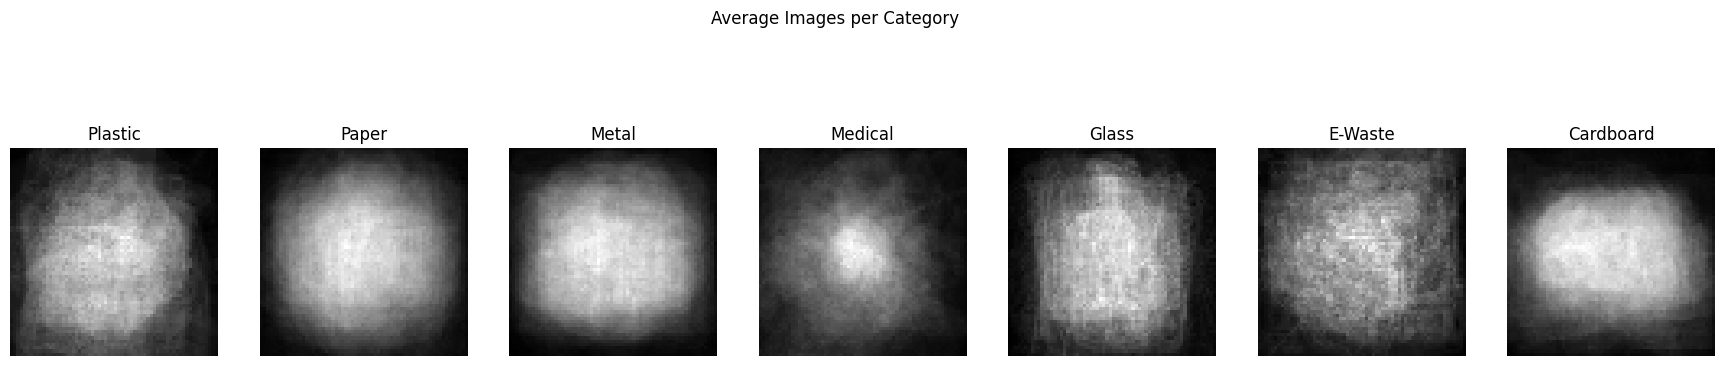

In [46]:
# %%time
show_all_average_images(plastic_samples,
                        paper_samples,
                        metal_samples,
                        medical_samples,
                        glass_samples,
                        e_waste_samples,
                        cardboard_samples)

## **Principal Component Analysis (PCA)**

PCA is a method used to reduce the dimensionality of large data sets by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Here we have started with varied size images, which we have transformed to 64 X 64 grayscale images. However, each flattened image still has quite high dimension of 4096. 95% of the variance can be explained by much smaller size without losing much information through PCA. Reducing our dimensionality will allow faster computation with less computational resources.

We see the following reductions that are achieved by PCA application in individual categories:

<li>Plastic : 15 </li>
<li>Paper : 50 </li>
<li>Metal : 51 </li>
<li>Medical : 36 </li>
<li>Glass : 17 </li>
<li>E-Waste : 22 </li>
<li>Cardboard : 29 </li>

Note that this PCA was performed just for the preprocessed images themselves, not the features as we have not yet conducted any feature extraction.


In [60]:
%%time
### EDA

def get_eigenimages(data):
    D = np.zeros((len(data), (64 * 64)))

    for i, img in enumerate(data):
        D[i, :] = img.flatten()

    pca = PCA().fit(D)

    # How many principal components explain 95% of the variance?
    var_cum = np.cumsum(pca.explained_variance_ratio_)*100
    k = np.argmax(var_cum>95)
    print("Number of principal components explaining 95% of variance: "+ str(k))

    return pca.components_[:k]


def show_all_eigenimages(plastic_samples,
                        paper_samples,
                        metal_samples,
                        medical_samples,
                        glass_samples,
                        e_waste_samples,
                        cardboard_samples):

    plt.figure(figsize = (20,14))
    plt.suptitle("Eigenimages per Category")

    images = get_eigenimages(plastic_samples)
    subplot_idx = 1

    for i in range(1, 10):
        ax = plt.subplot(7, 9, subplot_idx)
        subplot_idx += 1
        ax.set_title("Plastic " + str(i))
        ax.set_axis_off()
        ax.imshow(images[i].reshape((64, 64)), cmap="gray")

    images = get_eigenimages(paper_samples)

    for i in range(1, 10):
        ax = plt.subplot(7, 9, subplot_idx)
        subplot_idx += 1
        ax.set_title("Paper " + str(i))
        ax.set_axis_off()
        ax.imshow(images[i].reshape((64, 64)), cmap="gray")

    images = get_eigenimages(metal_samples)

    for i in range(1, 10):
        ax = plt.subplot(7, 9, subplot_idx)
        subplot_idx += 1
        ax.set_title("Metal " + str(i))
        ax.set_axis_off()
        ax.imshow(images[i].reshape((64, 64)), cmap="gray")

    images = get_eigenimages(medical_samples)

    for i in range(1, 10):
        ax = plt.subplot(7, 9, subplot_idx)
        subplot_idx += 1
        ax.set_title("Medical " + str(i))
        ax.set_axis_off()
        ax.imshow(images[i].reshape((64, 64)), cmap="gray")

    images = get_eigenimages(glass_samples)

    for i in range(1, 10):
        ax = plt.subplot(7, 9, subplot_idx)
        subplot_idx += 1
        ax.set_title("Glass " + str(i))
        ax.set_axis_off()
        ax.imshow(images[i].reshape((64, 64)), cmap="gray")

    images = get_eigenimages(e_waste_samples)

    for i in range(1, 10):
        ax = plt.subplot(7, 9, subplot_idx)
        subplot_idx += 1
        ax.set_title("E-Waste " + str(i))
        ax.set_axis_off()
        ax.imshow(images[i].reshape((64, 64)), cmap="gray")

    images = get_eigenimages(cardboard_samples)

    for i in range(1, 10):
        ax = plt.subplot(7, 9, subplot_idx)
        subplot_idx += 1
        ax.set_title("Cardboard " + str(i))
        ax.set_axis_off()
        ax.imshow(images[i].reshape((64, 64)), cmap="gray")

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 11.2 µs


Number of principal components explaining 95% of variance: 15
Number of principal components explaining 95% of variance: 50
Number of principal components explaining 95% of variance: 51
Number of principal components explaining 95% of variance: 36
Number of principal components explaining 95% of variance: 17
Number of principal components explaining 95% of variance: 22
Number of principal components explaining 95% of variance: 29
CPU times: user 1.95 s, sys: 401 ms, total: 2.35 s
Wall time: 3.32 s


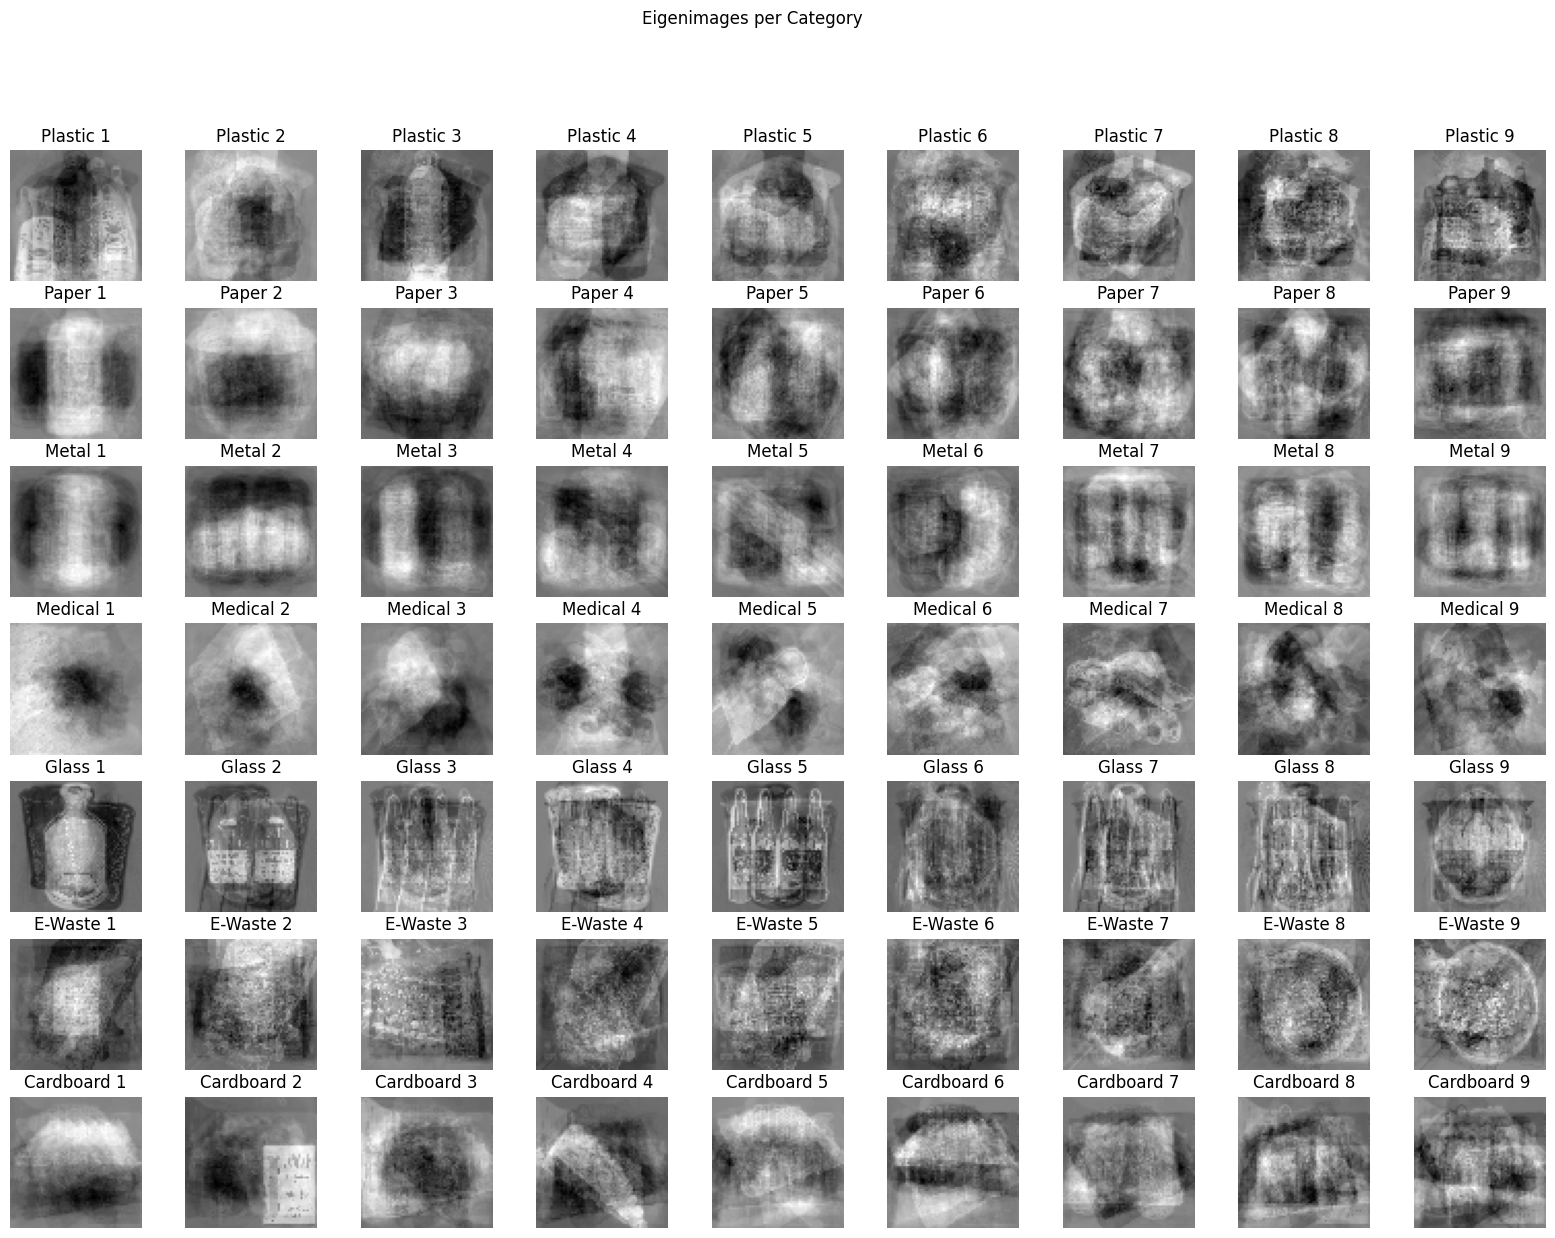

In [62]:
%%time
show_all_eigenimages(plastic_samples,
                        paper_samples,
                        metal_samples,
                        medical_samples,
                        glass_samples,
                        e_waste_samples,
                        cardboard_samples)

### **Data Split**

We split the train and test in 80:20 ratio. For k-fold cross validation, we split the train data into train (90%) and validation (10%) and for each k-fold we tested the performance on the same test set to prevent data leakage. In this section we defined the train/test/validation split.

In [64]:
def flatten_np_arry(np_array):
  '''
  Returns a contiguous flattened array. A 1-D array, containing the elements of the input, is returned.
  '''
  return np.array([np.ravel(arr) for arr in np_array])

In [82]:
#@title
%%time

raw_image = np.concatenate((flatten_np_arry(plastic_samples),
                            flatten_np_arry(paper_samples),
                            flatten_np_arry(metal_samples),
                            flatten_np_arry(medical_samples),
                            flatten_np_arry(glass_samples),
                            flatten_np_arry(e_waste_samples),
                            flatten_np_arry(cardboard_samples)
                           )
                          )
# print(f'raw_image: {len(raw_image)}\n{raw_image}')

shuffle = np.random.permutation(np.arange(len(raw_image)))   # shuffle the indices of the raw_image array. to ensure that the data is randomized before splitting into training and test sets, which helps to reduce bias and improve model generalization.
# print(f'flatten-shuffle: {len(shuffle)}\n{shuffle}')

raw_image_orig = np.concatenate((plastic_samples,
                        paper_samples,
                        metal_samples,
                        medical_samples,
                        glass_samples,
                        e_waste_samples,
                        cardboard_samples
                           )
                          )
# print(f'raw_image_orig: {len(raw_image_orig)}\n{raw_image_orig}')

shuffle = np.random.permutation(np.arange(len(raw_image_orig)))   # shuffle the indices of the raw_image array. to ensure that the data is randomized before splitting into training and test sets, which helps to reduce bias and improve model generalization.
# print(f'org-shuffle: {len(shuffle)}\n{shuffle}')

# 80/20 train and test split
X_orig, y_orig = raw_image_orig[shuffle], label[shuffle]
# print(f'X_orig = {len(X_orig), X_orig}')
# print(f'y_orig = {len(y_orig), y_orig}')

X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig,
                                                                        y_orig,
                                                                        test_size=0.2,
                                                                        random_state=42)
# print(f'X_orig_train = {len(X_orig_train), X_orig_train}')
# print(f'y_orig_train = {len(y_orig_train), y_orig_train}')

# Splitting the training data into training and validation with 90/10 for Cross-Validation
split = (0.9, 0.1) #70% training and 30% test
splits = np.multiply(len(y_orig_train), split).astype(int)
# print(f'splits = {splits}')

X_orig_train, X_orig_val = np.split(X_orig_train, [splits[0]])
y_orig_train, y_orig_val = np.split(y_orig_train, [splits[0]])

# Normalize the pixel values in the images by dividing by 255. It scales the pixel values to be between 0 and 1, which can lead to better performance in neural network models.
X_orig_train = X_orig_train / 255
X_orig_val = X_orig_val / 255
X_orig_test = X_orig_test / 255


X, y = raw_image[shuffle], label[shuffle]
df_raw = pd.DataFrame(X)
df_raw['label'] = y
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
df_train = pd.DataFrame(X_train)
df_train['label'] = y_train
df_test = pd.DataFrame(X_test)
df_test['label'] = y_test

CPU times: user 16.8 ms, sys: 0 ns, total: 16.8 ms
Wall time: 16.7 ms


In [74]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,12,11,20,18,31,31,23,23,16,17,...,0,2,11,2,1,1,1,0,0,3.0
2,4,27,63,127,112,110,103,91,76,75,...,17,15,14,13,13,11,4,1,1,2.0
3,0,0,1,1,0,0,0,0,0,0,...,5,6,3,2,5,2,0,1,0,6.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
376,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.0
377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
378,1,0,1,1,1,2,3,3,4,4,...,0,0,0,0,0,0,0,0,0,1.0


In [75]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
2,5,7,5,5,3,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,2.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,0,0,0,0,0,0,0,0,...,48,43,67,98,49,53,67,128,81,4.0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
93,0,0,0,0,1,1,1,1,2,6,...,0,0,0,0,0,0,0,0,0,6.0
94,0,0,0,0,1,1,2,3,1,1,...,1,2,2,2,1,3,2,2,2,2.0


## **Helper Function**

In [110]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          saved_img_name="cm.png",
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig(saved_img_name, bbox_inches='tight')


def get_val_test_base_grid_level_stats(file_name):
    df = pd.read_csv(file_name)
    df_agg = df.agg({'base_val_accuracy' : [np.min, np.mean, np.max],
            'grid_val_accuracy' : [np.min, np.mean, np.max],
            'base_test_accuracy' : [np.min, np.mean, np.max],
            'grid_test_accuracy' : [np.min, np.mean, np.max]
           }
          ).T
    df_agg.reset_index(inplace = True)
    df_agg.columns = ['kpi_level', 'min_accuracy', 'avg_accuracy', 'max_accuracy']
    display(df_agg)

def get_category_level_stats(file_name):
    df = pd.read_csv(file_name)
    df.columns = ['kfold',
                   'y_pred_val_base',
                   'y_pred_test_base',
                   'y_pred_val_grid',
                   'y_pred_test_base',
                   'cm_val_base',
                   'cm_test_base',
                   'cm_val_grid',
                   'cm_test_grid']
    df['cm_val_base'] = df['cm_val_base'].apply(lambda x : x.replace("  ", ",").replace("\n ", ",").replace(" ",",").replace('[[','[').replace("[,","["))
    df['cm_test_base'] = df['cm_test_base'].apply(lambda x : x.replace("  ", ",").replace("\n ", ",").replace(" ",",").replace('[[','[').replace("[,","["))
    df['cm_val_grid'] = df['cm_val_grid'].apply(lambda x : x.replace("  ", ",").replace("\n ", ",").replace(" ",",").replace('[[','[').replace("[,","["))
    df['cm_test_grid'] = df['cm_test_grid'].apply(lambda x : x.replace("  ", ",").replace("\n ", ",").replace(" ",",").replace('[[','[').replace("[,","["))

    df['cm_val_base'] = df['cm_val_base'].apply(lambda x : "[" + x)
    df['cm_test_base'] = df['cm_test_base'].apply(lambda x : "[" + x)
    df['cm_val_grid'] = df['cm_val_grid'].apply(lambda x : "[" + x)
    df['cm_test_grid'] = df['cm_test_grid'].apply(lambda x : "[" + x)

    k_fold_stats = []
    for col in ['cm_val_base', 'cm_test_base', 'cm_val_grid', 'cm_test_grid']:
        for rec in df[['kfold', col]].values.tolist():
            kfold, cm = rec[0], rec[1]
            cm_split = cm.split("],[")
            cm_split = [e.replace("[[","[").replace("]]","]") for e in cm_split]
            cm_split = ["[" + e if "[" not in e else e for e in cm_split]
            cm_split = [e + "]" if "]" not in e else e for e in cm_split]

            battery_rec = ast.literal_eval(cm_split[0])
            cardboard_rec = ast.literal_eval(cm_split[1])
            plates_rec = ast.literal_eval(cm_split[2])
            paper_rec = ast.literal_eval(cm_split[3])
            paper_towel_rec = ast.literal_eval(cm_split[4])

            battery_correct_pct = battery_rec[0] / np.sum(battery_rec)
            cardbaord_correct_pct = cardboard_rec[1] / np.sum(cardboard_rec)
            plates_correct_pct = plates_rec[2] / np.sum(plates_rec)
            paper_correct_pct = paper_rec[3] / np.sum(paper_rec)
            paper_towel_correct_pct = paper_towel_rec[4] / np.sum(paper_towel_rec)
            k_fold_stats.append([kfold, col, battery_correct_pct,cardbaord_correct_pct,plates_correct_pct,paper_correct_pct,paper_towel_correct_pct])

    df_ctg_wise_stats = pd.DataFrame(k_fold_stats,
                                     columns = ['kfold',
                                                'kpi',
                                                'battery_correct_pct',
                                                'cardbaord_correct_pct',
                                                'plates_correct_pct',
                                                'paper_correct_pct',
                                                'paper_towel_correct_pct'
                                               ]
                                    )
    df_ctg_wise_stats_consolidated = df_ctg_wise_stats.groupby(['kpi']).agg({'battery_correct_pct' : [np.min, np.mean, np.max],
                                                                             'cardbaord_correct_pct' : [np.min, np.mean, np.max],
                                                                             'plates_correct_pct' : [np.min, np.mean, np.max],
                                                                             'paper_correct_pct' : [np.min, np.mean, np.max],
                                                                             'paper_towel_correct_pct' : [np.min, np.mean, np.max]
                                                                            }
                                                                           ).reset_index()
    df_ctg_wise_stats_consolidated.columns = ['kpi',
                                              'battery_correct_pct_min',
                                              'battery_correct_pct_avg',
                                              'battery_correct_pct_max',
                                              'cardboard_correct_pct_min',
                                              'cardboard_correct_pct_avg',
                                              'cardboard_correct_pct_max',
                                              'plates_correct_pct_min',
                                              'plates_correct_pct_avg',
                                              'plates_correct_pct_max',
                                              'paper_correct_pct_min',
                                              'paper_correct_pct_avg',
                                              'paper_correct_pct_max',
                                              'paper_towel_correct_pct_min',
                                              'paper_towel_correct_pct_avg',
                                              'paper_towel_correct_pct_max',
                                             ]
    display(df_ctg_wise_stats_consolidated.T)
    ctg_file_name = file_name.split("_exec_stats.csv")[0] + "_ctg_level_stats.csv"
    df_ctg_wise_stats_consolidated.T.to_csv(ctg_file_name)


## **Classification**

In order to maximize model predictive performance and generalizability and ensure no data leakage during the construction of our model pipeline, we made sure to:

1) Apply the same preprocessing to all images in the cases where the preprocessing was learned, and used appropriate fit/transform methods.

2) We used proper procedures for train/validation/test splits and made sure that our models did not see the test data until the final evaluation.

3) PCA was to reduce cardinality and improve model performance.

4) We used GridSearch CV to tune model hyperparameters.

5) We implemented K-Fold Validation to make sure that our model was generalizable and not scoring well due to chance.

6) Finally, we tuned the hyperparameters of our features to ensure we were getting the most power from them.


## **Model Construction**

We tested many different model types during our experimentation, including logistic regression models and CNNs. The results of these can be found in [this linked notebook](). The best performing model was the Support Vector Machine (SVM), with an average accuracy of 60.8% on our validation set during our K-Fold validation after feature extraction. This was run on the GLCM-LBP-HOG features (more on what these are later). The battery and disposal plate classes had the highest accuracy, as the images in these classes had the least variety in shape and texture.

For this experiment, we weighted the accuracy of the battery class highest, as a model that is accurate for battery classification is critical for our use case as having a battery misclassified as another form of recycling would have dire consequences for the recycling process. If any of the others were misclassified, for example, a paper plate was classified as cardboard, it would not impact how the item is handled at the recycling center.

As we perform our feature extraction in the next section, we will run all of our features and different combinations of features in an SVM model and display the accuracy & confusion matrix of the best k-fold validation to understand the strengths and weaknesses of those features.




### **1. Dummy Classifier**

Before starting feature extraction, we wanted to establish a baseline model. For this step, we created a dummy classifier to determine the minimum level our model has to perform to say it is better than chance. This model labels all test data as the most frequent class and sees the accuracy of that approach. This can be thought of as the "blind luck" approach. Here we had 21% accuracy.

We want to ensure that a model run with each of our features performs better than this to ensure that it is actually adding value.

In [89]:
dummy_clf = DummyClassifier(strategy="most_frequent")
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(dummy_clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(f'Average Accuracy: {np.round(np.mean(scores), 2)*100}%')
scores

Average Accuracy: 21.0%


array([0.20833333, 0.20833333, 0.20833333, 0.20833333, 0.20833333,
       0.20833333, 0.21276596, 0.21276596, 0.21276596, 0.21276596,
       0.20833333, 0.20833333, 0.20833333, 0.20833333, 0.20833333,
       0.20833333, 0.21276596, 0.21276596, 0.21276596, 0.21276596,
       0.20833333, 0.20833333, 0.20833333, 0.20833333, 0.20833333,
       0.20833333, 0.21276596, 0.21276596, 0.21276596, 0.21276596])

### **2. SVM Classifier**

In [101]:
print(df_train.columns[:-1])
print(set(df_train['label']))
df_test.head()
df_train.head()

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4095],
      dtype='object', length=4096)
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0}


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


In [111]:
#@title
%%time
def svm_classifier(df_train, df_test, confusion_matrix_label, file_name, label_list):
    exec_stats = []
    accuracy_stats = []
    file_name_wo_ext = file_name.split(".")[0]
    print(f'file_name_wo_ext = {file_name_wo_ext}')
    for kfold, (train_indices, val_indices) in enumerate(StratifiedKFold(n_splits     = 5,
                                                                         shuffle      = True,
                                                                         random_state = 42
                                                                         ).split(df_train['label'].values.tolist(),
                                                                                 df_train['label'].values.tolist()
                                                                                )
                                                        ):
        # print(f'kfold, (train_indices, val_indices) = {kfold, (train_indices, val_indices)}')
        print("***************************************************************")
        print(f"kfold : {kfold + 1}")
        sel_cols = df_train.columns[:-1]
        X_train = df_train.iloc[train_indices][sel_cols].values
        y_train = df_train.iloc[train_indices]['label'].values

        X_val = df_train.iloc[val_indices][sel_cols].values
        y_val = df_train.iloc[val_indices]['label'].values

        X_test = df_test[sel_cols].values
        y_test = df_test['label'].values

        print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
        print("****")
        scaler = StandardScaler()
        X_train_std = scaler.fit(X_train).transform(X_train)
        X_val_std = scaler.fit(X_train).transform(X_val)
        X_test_std = scaler.fit(X_train).transform(X_test)

        clf = SVC(gamma='auto', break_ties=True)           # SVM classifier
        clf.fit(X_train_std, y_train)
        y_pred_val_base = clf.predict(X_val_std)
        cm_val_base = confusion_matrix(y_val, y_pred_val_base)
        # return cm_val_base


        plot_confusion_matrix(cm_val_base,
                              label_list,
                              confusion_matrix_label,
                              saved_img_name=file_name_wo_ext + "_val_base_" + str(kfold + 1) + ".png"
                             )
        print(f"Validation results for fold {kfold+1}")
        print(classification_report(y_val, y_pred_val_base, target_names=label_list))

        y_pred_test_base = clf.predict(X_test_std)
        cm_test_base = confusion_matrix(y_test, y_pred_test_base)
        plot_confusion_matrix(cm_test_base,
                              label_list,
                              confusion_matrix_label,
                              saved_img_name=file_name_wo_ext + "_test_base_" + str(kfold + 1) + ".png"
                             )
        print(f"Test results for fold {kfold+1}")
        print(classification_report(y_test, y_pred_test_base, target_names=label_list))

        param_grid = {'C': [1, 1000, 100000],
                      'gamma': [0.01, 0.0001, 0.000001],
                      'kernel': ['rbf']}
        grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
        # fitting the model for grid search
        grid.fit(X_train_std, y_train)
        # print best parameter after tuning
        print(grid.best_params_)
        # print how our model looks after hyper-parameter tuning
        print(grid.best_estimator_)
        y_pred_val_grid = grid.predict(X_val_std)
        cm_val_grid = confusion_matrix(y_val, y_pred_val_grid)
        plot_confusion_matrix(cm_val_grid,
                              label_list,
                              confusion_matrix_label,
                              saved_img_name=file_name_wo_ext + "_val_grid_" + str(kfold + 1) + ".png"
                             )
        print(f"Validation grid search results for fold {kfold+1}")
        print(classification_report(y_val, y_pred_val_grid, target_names=label_list))

        y_pred_test_grid = grid.predict(X_test_std)
        cm_test_grid = confusion_matrix(y_test, y_pred_test_grid)
        plot_confusion_matrix(cm_test_grid,
                              label_list,
                              confusion_matrix_label,
                              saved_img_name=file_name_wo_ext + "_test_grid_" + str(kfold + 1) + ".png"
                             )
        print(f"Test grid search results for fold {kfold+1}")
        print(classification_report(y_test, y_pred_test_grid, target_names=label_list))
        stats_details = [kfold + 1,
                         y_pred_val_base,
                         y_pred_test_base,
                         y_pred_val_grid,
                         y_pred_test_base,
                         cm_val_base,
                         cm_test_base,
                         cm_val_grid,
                         cm_test_grid
                        ]
        exec_stats.append(stats_details)
        accuracy = [kfold + 1,
                    accuracy_score(y_val, y_pred_val_base),
                    accuracy_score(y_test, y_pred_test_base),
                    accuracy_score(y_val, y_pred_val_grid),
                    accuracy_score(y_test, y_pred_test_grid),
                   ]
        accuracy_stats.append(accuracy)
        #return y_pred_val_base, cm_val_base, y_pred_grid, cm_grid
        pd.DataFrame(exec_stats).to_csv(file_name_wo_ext + "_exec_stats.csv", index = False)
        pd.DataFrame(accuracy_stats, columns = ['fold',
                                                'base_val_accuracy',
                                                'base_test_accuracy',
                                                'grid_val_accuracy',
                                                'grid_test_accuracy'
                                               ]).to_csv(file_name_wo_ext + "_batch_level_accuracy_stats.csv", index = False)
    print("Overall Stats....")
    get_val_test_base_grid_level_stats(file_name_wo_ext + "_accuracy_stats.csv")
    print("Category Wise Stats...")
    get_category_level_stats(file_name_wo_ext + "_exec_stats.csv")

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11 µs


file_name_wo_ext = SVM_Raw_Image
***************************************************************
kfold : 1
(304, 4096) (304,) (76, 4096) (76,) (96, 4096) (96,)
****
Validation results for fold 1
              precision    recall  f1-score   support

     Plastic       0.00      0.00      0.00         6
       Paper       0.25      0.44      0.32        16
       Metal       0.25      0.13      0.17        15
     Medical       0.25      0.71      0.37        14
       Glass       0.00      0.00      0.00         6
     E-Waste       0.00      0.00      0.00         8
   Cardboard       0.00      0.00      0.00        11

    accuracy                           0.25        76
   macro avg       0.11      0.18      0.12        76
weighted avg       0.15      0.25      0.17        76

Test results for fold 1
              precision    recall  f1-score   support

     Plastic       0.00      0.00      0.00         8
       Paper       0.22      0.44      0.30        18
       Metal       0.

FileNotFoundError: [Errno 2] No such file or directory: 'SVM_Raw_Image_accuracy_stats.csv'

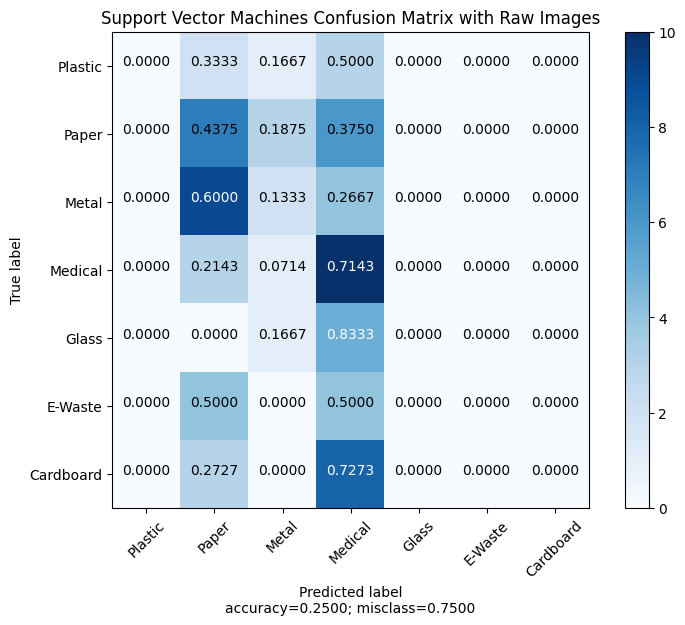

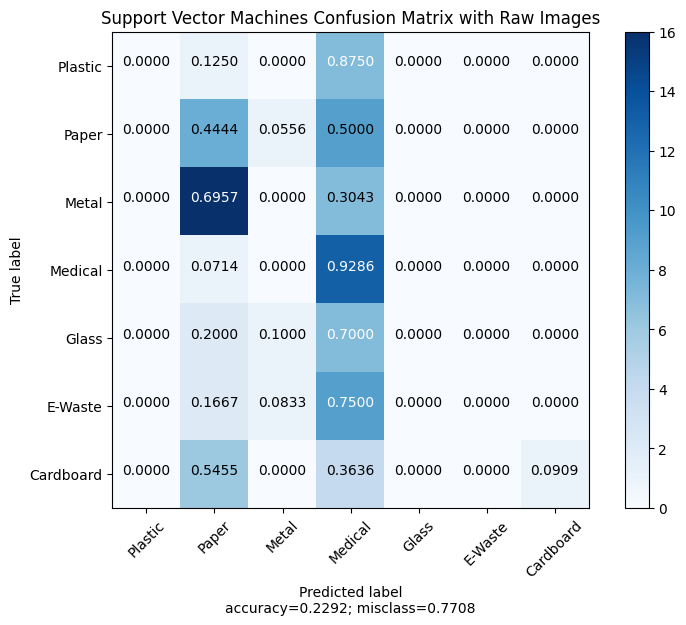

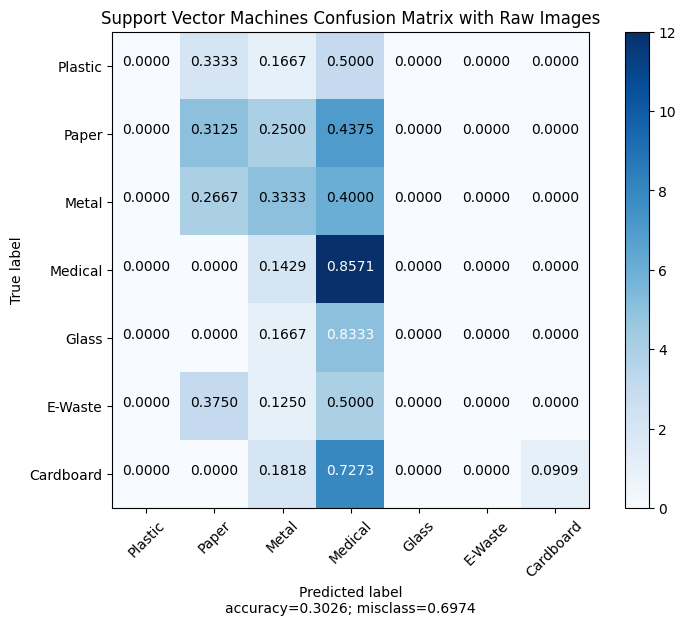

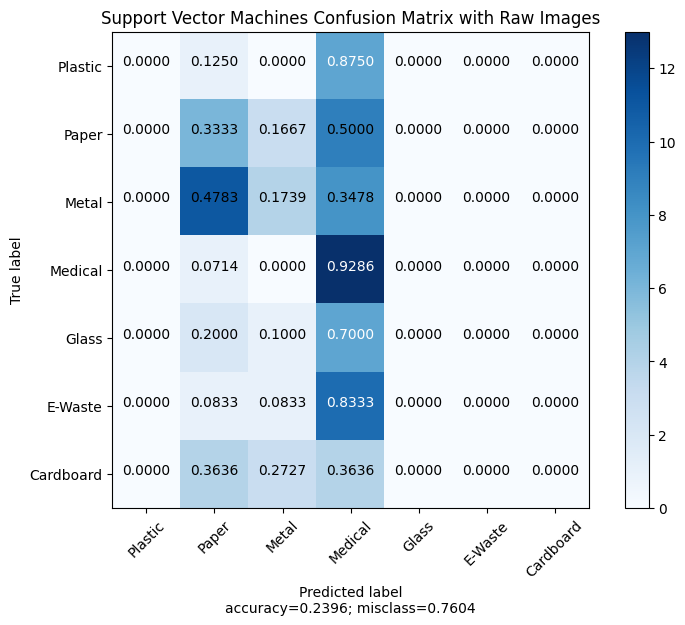

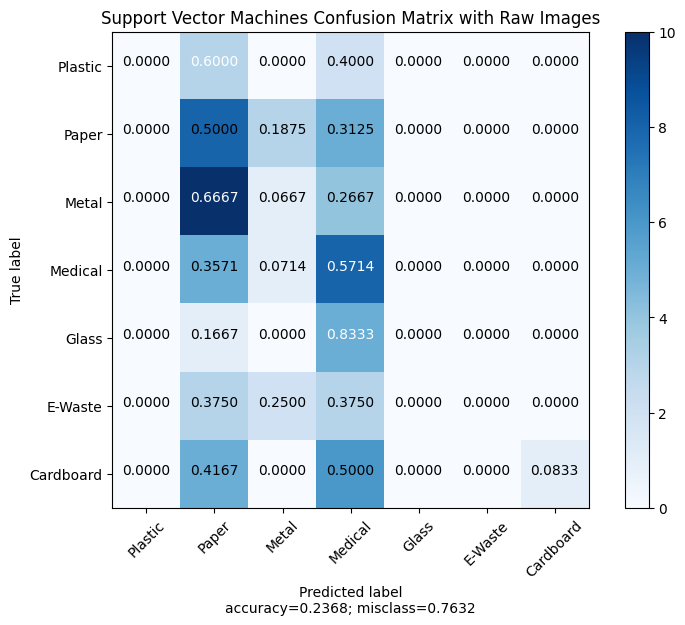

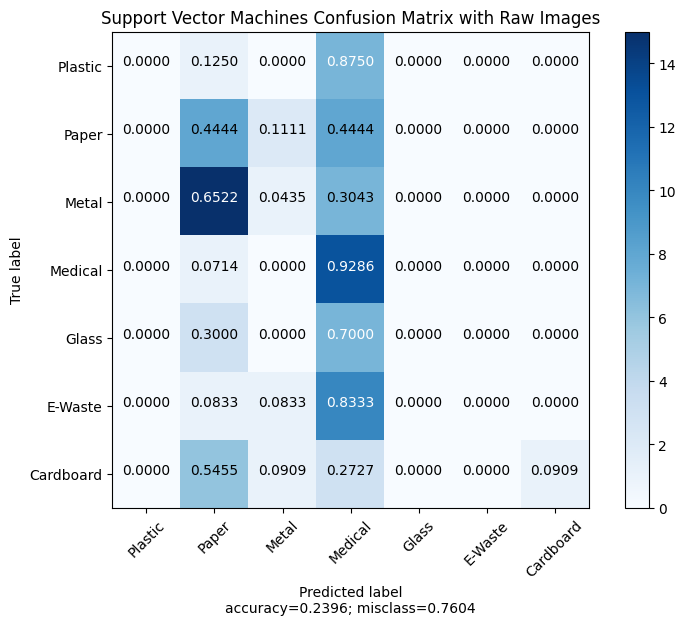

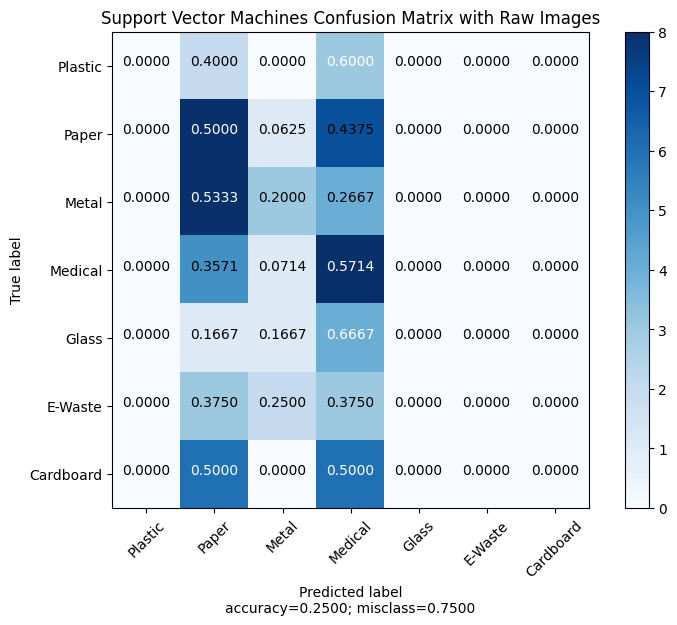

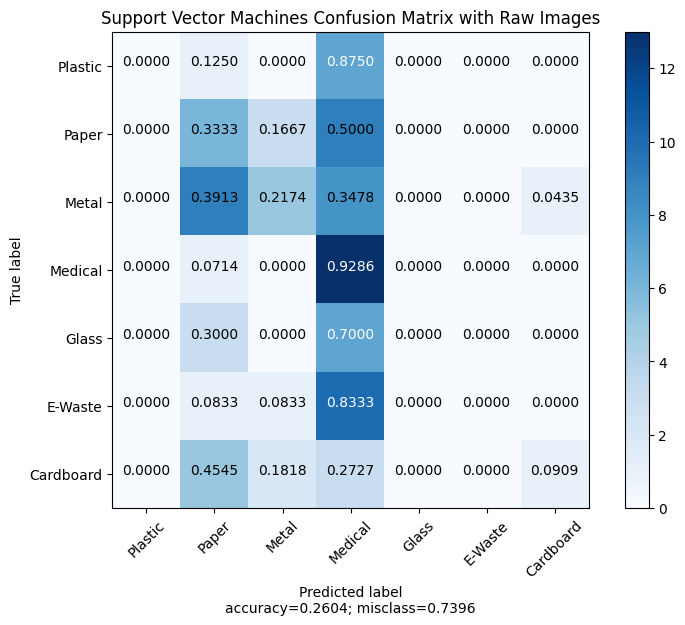

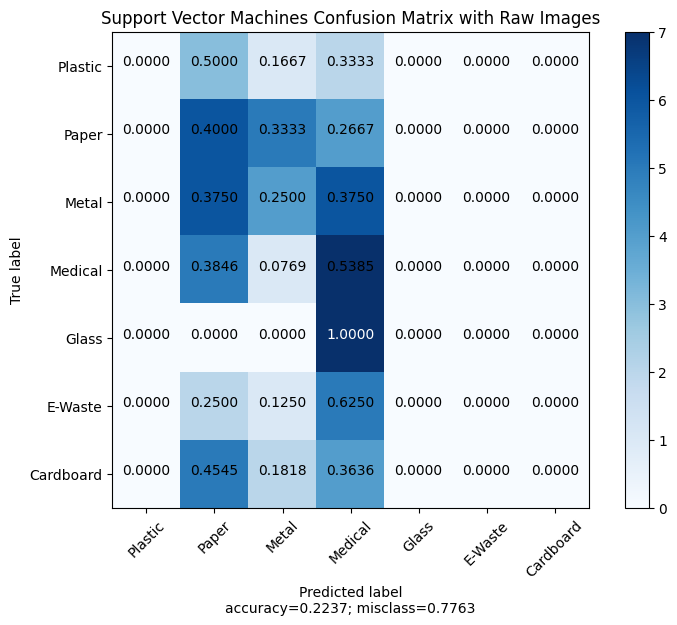

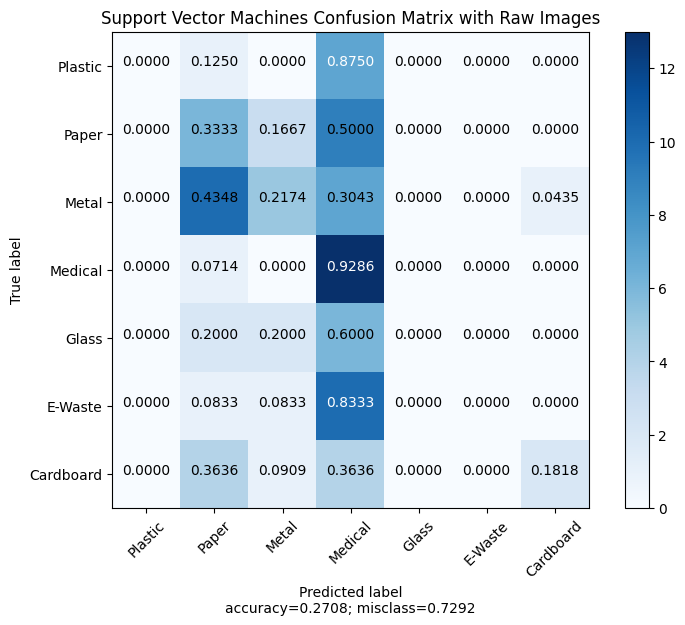

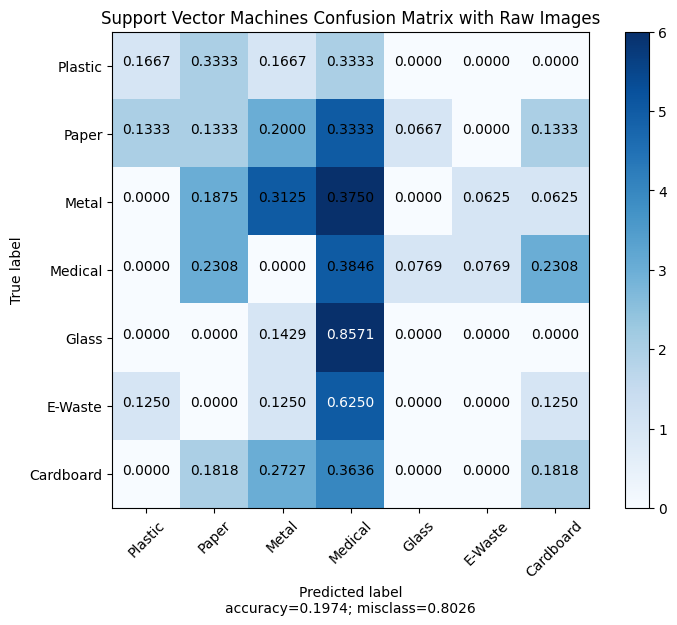

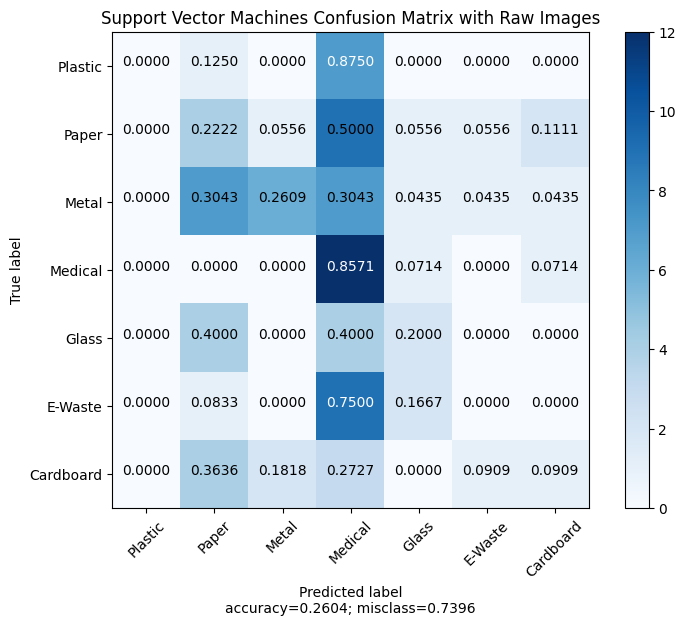

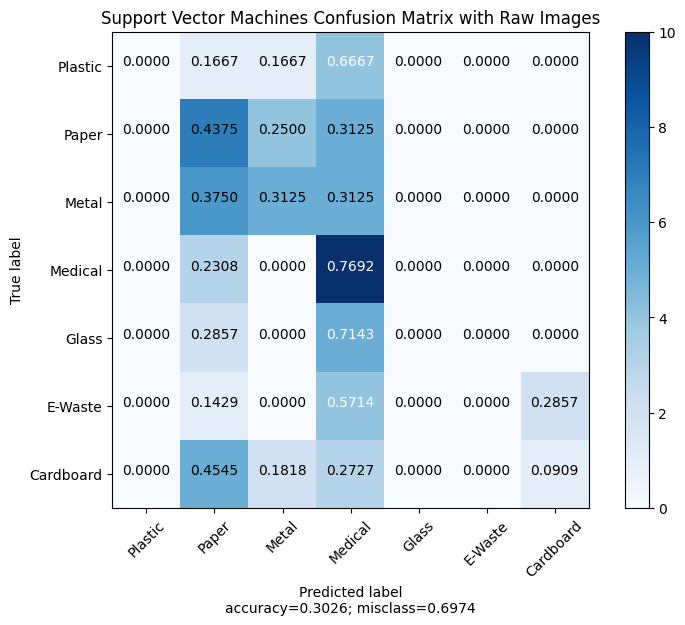

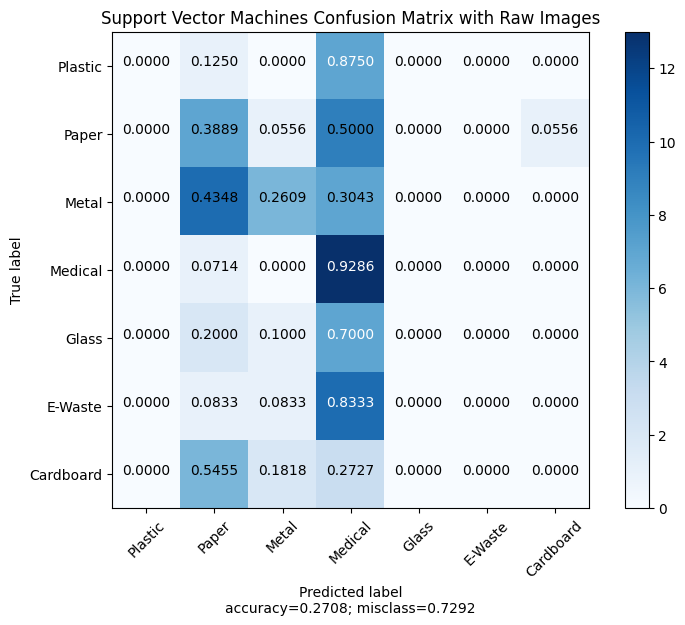

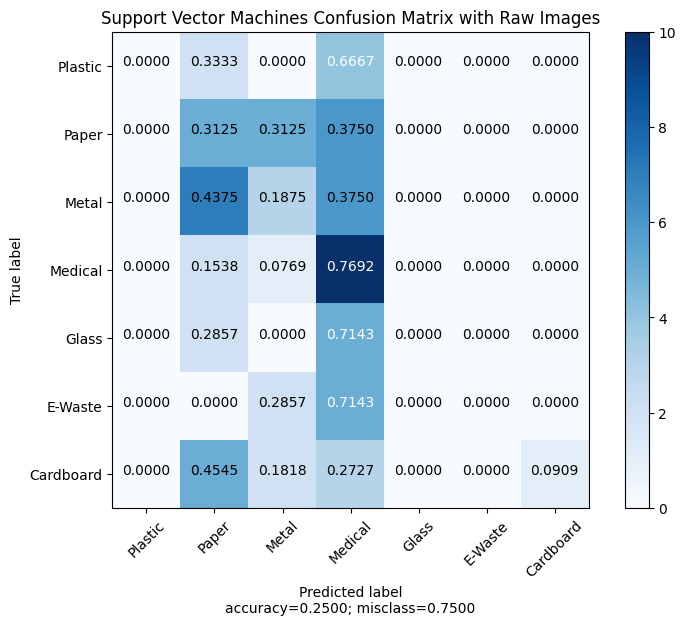

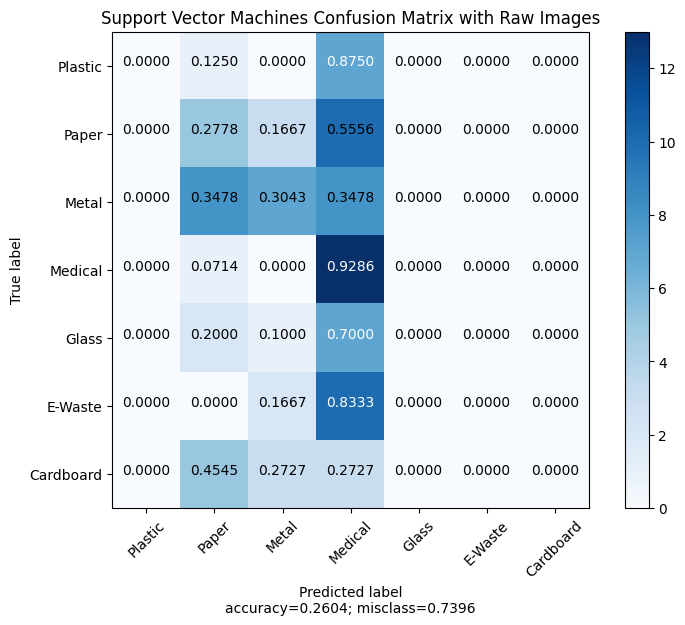

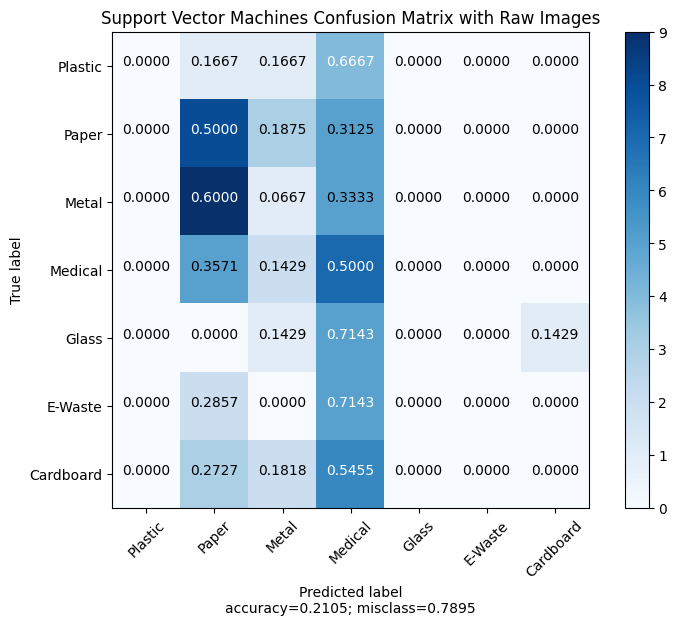

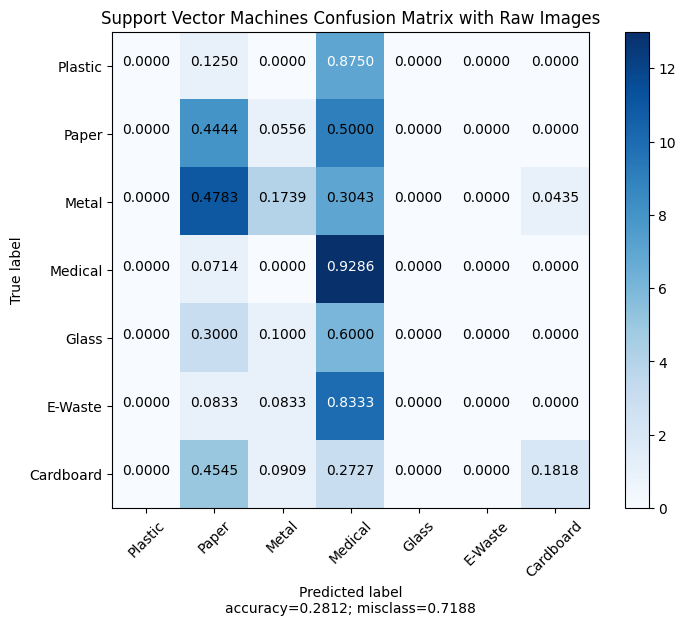

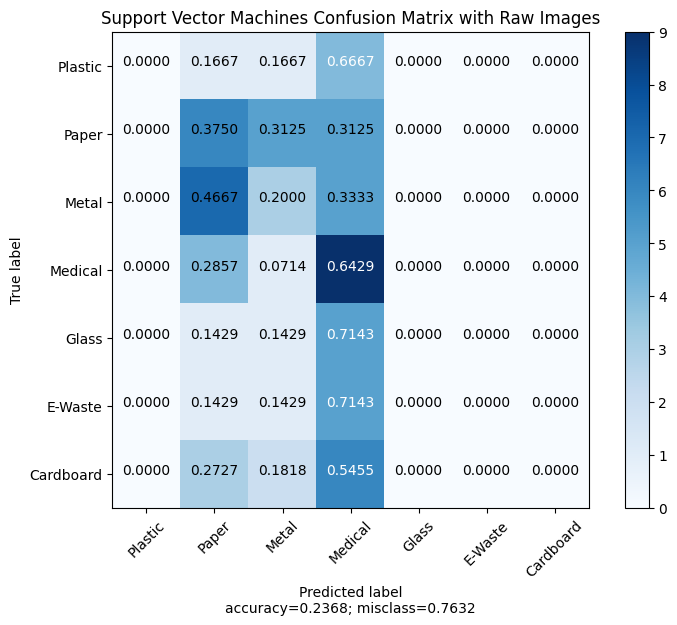

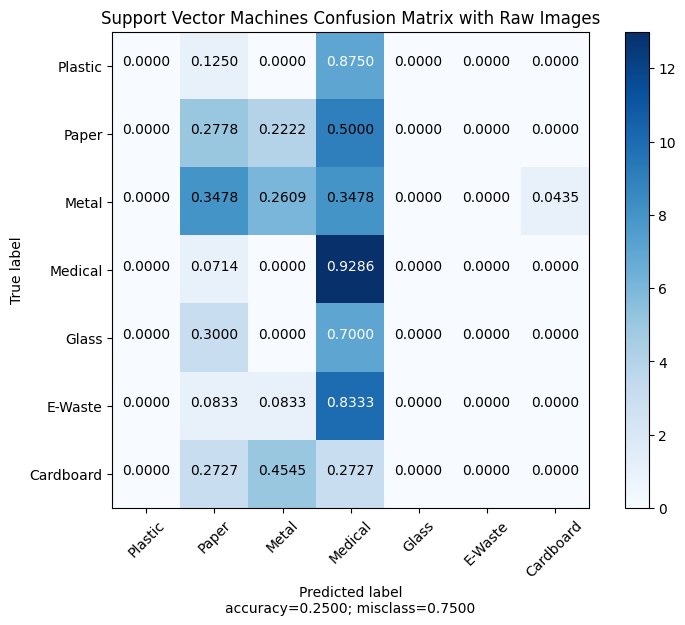

In [112]:
svm_classifier(df_train,
               df_test,
               "Support Vector Machines Confusion Matrix with Raw Images",
               "SVM_Raw_Image.png",
               label_list
              )

In [91]:
#@title
%%time
def preprocess_and_classification_svm(df, label_list, title_name, file_name):
    X, y = df.drop(["label"], axis=1).values, df["label"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    df_train = pd.DataFrame(X_train)
    df_train['label'] = list(y_train)

    df_test = pd.DataFrame(X_test)
    df_test['label'] = list(y_test)

    svm_classifier(df_train,
                   df_test,
                   title_name,
                   file_name,
                   label_list
                  )

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.06 µs


# **YenCheng's Code from Here**

In [ ]:

# making n X m matrix
def img2np(path, list_of_filename, size = (300, 300)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        im = Image.open(fp, 'r')
        # covert image to a matrix
        img_ts = np.array(im)
        img_ts = img_ts.astype(np.float32) / 255
        try:
            # concatenate different images
            full_mat = full_mat + [img_ts]
        except UnboundLocalError:
            # if not assigned yet, assign one
            full_mat = [img_ts]
    return full_mat

## TrashBox

In [ ]:
# # run it on our folders
# trashbox_cardboard_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/TrashBox_train_dataset_subfolders/cardboard/'
# trashbox_cardboard_images = img2np(path = trashbox_cardboard_path, list_of_filename = os.listdir(trashbox_cardboard_path[:21]))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDriv'

In [ ]:
print('Number of Cardboard Images: ', len(os.listdir(trashbox_cardboard_path)))

In [ ]:
# for i in range(len(trashbox_cardboard_path)):
#   fig0 = plt.figure()
#   plt.imshow(trashbox_cardboard_images[i], interpolation='nearest', aspect='auto')
#   plt.xticks(ticks=[])
#   plt.yticks(ticks=[])
#   plt.show()

_, axs = plt.subplots(np.ceil(len(trashbox_cardboard_images)/10), 10, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(trashbox_cardboard_images, axs):
  ax.imshow(img)
  plt.show()

ValueError: Number of rows must be a positive integer, not 1.0

<Figure size 1200x1200 with 0 Axes>

In [ ]:
# EDA ideas
# Count how many images in each category of each dataset (Class imbalances)
# Size of different images (do we need to resize in cleaning)
# Aspect ratio of different images (proportional ratio of width to height)

## Drinking Waste Classification

In [ ]:
# find # of files

drinkingwaste_path = '/content/drive/MyDrive/MIDS_Capstone/Datasets/rawimgs/'
drinkingwaste_folders = os.listdir(drinkingwaste_path)
if '.DS_Store' in drinkingwaste_folders:
    drinkingwaste_folders.remove('.DS_Store')

df_dw = pd.DataFrame(columns = drinkingwaste_folders)

for f in drinkingwaste_folders:
  folder_path = os.path.join(drinkingwaste_path, f)

  if os.path.isdir(folder_path):
    print(f'folder_path = {folder_path}')
    print(f)
    files_in_folder = os.listdir(folder_path)
    print(f'files_in_folder = {files_in_folder}')
    num_files = len(files_in_folder)

    df_dw.loc[0, f] = num_files


print(df_dw)


#dringkingwaste_pet_images = img2np(path = drinkingwaste_pet_path, list_of_filename = os.listdir(drinkingwaste_pet_path))

folder_path = /content/drive/MyDrive/MIDS_Capstone/Datasets/rawimgs/PET
PET
files_in_folder = ['PET1,625.jpg', 'PET1,478.jpg', 'PET1,760.jpg', 'PET1,754.jpg', 'PET1,578.jpg', 'PET1,672.jpg', 'PET1,662.jpg', 'PET283.jpg', 'PET1,649.jpg', 'PET1,650.jpg', 'PET1,671.jpg', 'PET1,666.jpg', 'PET1,620.jpg', 'PET1,498.jpg', 'PET286.jpg', 'PET1,600.jpg', 'PET1,669.jpg', 'PET280.jpg', 'PET1,579.jpg', 'PET1,516.jpg', 'PET1,618.jpg', 'PET287.jpg', 'PET294.jpg', 'PET1,724.jpg', 'PET1,586.jpg', 'PET1,640.jpg', 'PET1,598.jpg', 'PET1,717.jpg', 'PET1,635.jpg', 'PET324.jpg', 'PET1,505.jpg', 'PET1,609.jpg', 'PET1,479.jpg', 'PET1,525.jpg', 'PET1,580.jpg', 'PET1,549.jpg', 'PET1,568.jpg', 'PET1,764.jpg', 'PET1,770.jpg', 'PET1,709.jpg', 'PET316.jpg', 'PET1,655.jpg', 'PET1,517.jpg', 'PET315.jpg', 'PET1,715.jpg', 'PET1,711.jpg', 'PET1,553.jpg', 'PET1,621.jpg', 'PET1,495.jpg', 'PET1,712.jpg', 'PET1,546.jpg', 'PET303.jpg', 'PET309.jpg', 'PET1,594.jpg', 'PET1,630.jpg', 'PET1,645.jpg', 'PET1,730.jpg', 'PET1,629.jpg

0 1508
1 1232
2 1028
3 1060


<ipython-input-113-9a031258b264>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (folder, value) in enumerate(df_dw.sum().iteritems()):


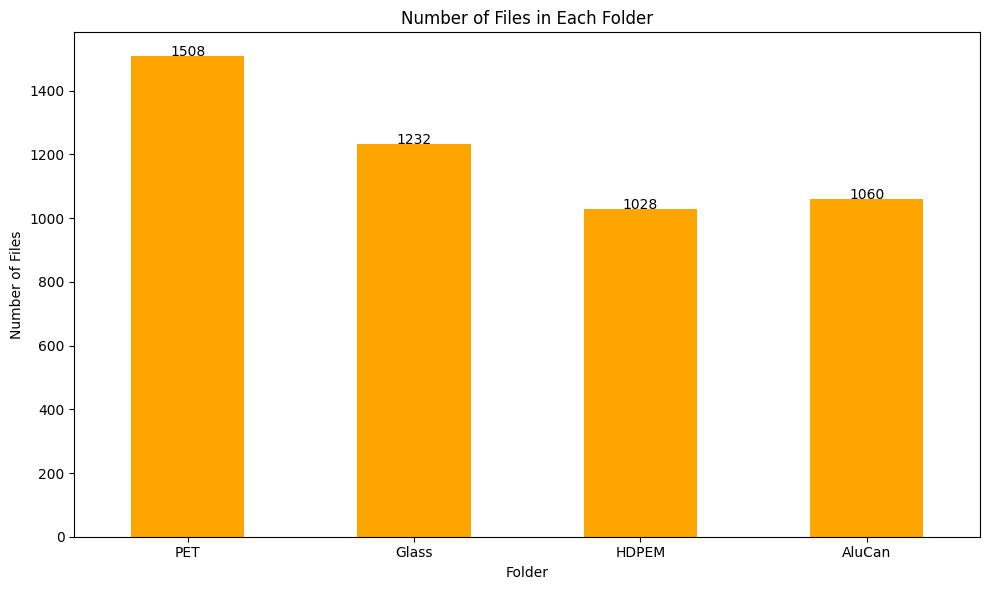

In [ ]:
# plot # of files

plt.figure(figsize=(10, 6))
df_dw.sum().plot(kind='bar', color='orange')
plt.title('Number of Files in Each Folder')
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

for i, (folder, value) in enumerate(df_dw.sum().iteritems()):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find format of images

ff_list = []

for f in drinkingwaste_folders:
  folder_path = os.path.join(drinkingwaste_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)

        root, extension = os.path.splitext(full_path)

        # Extract the file format (extension)
        file_format = extension[1:]  # Remove the leading dot

        ff_list.append(file_format)

ff_list = [s.upper() for s in ff_list]

counter = Counter(ff_list)

ff_sum = [(item, count) for item, count in counter.items()]
df_ff_sum = pd.DataFrame(ff_sum, columns=['Value', 'Frequency'])


print(df_ff_sum)

  Value  Frequency
0   JPG       4820
1  HEIC          8


0 4820
1 8


<Figure size 1000x600 with 0 Axes>

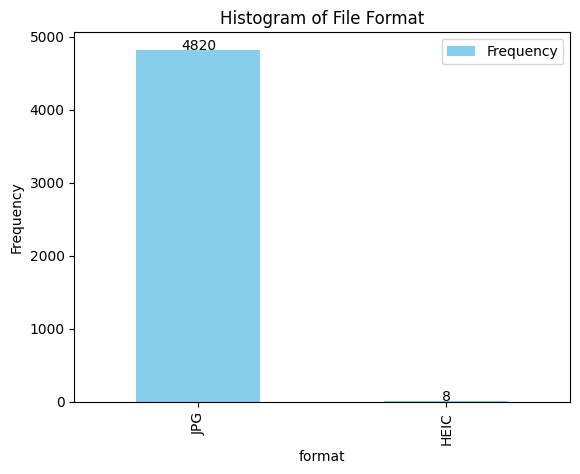

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
df_ff_sum.plot(x='Value', y='Frequency', kind='bar', color='skyblue')
plt.title('Histogram of File Format')
plt.xlabel('format')
plt.ylabel('Frequency')

for i, value in enumerate(df_ff_sum['Frequency']):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find shape of images

imgshape_list = []

for f in drinkingwaste_folders:
  folder_path = os.path.join(drinkingwaste_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)
        im = Image.open(full_path, 'r')

        image_size = str(im.size[0])+ 'x' + str(im.size[1])
        imgshape_list.append(image_size)
        #print(image_size)

counter = Counter(imgshape_list)
is_sum = [(item, count) for item, count in counter.items()]

df_is_sum = pd.DataFrame(is_sum, columns=['Value', 'Frequency'])

       Value  Frequency
0    384x512        389
1    512x683       3665
2    512x384        764
3  4032x3024          1
4  3024x4032          8
5    505x634          1


<Figure size 1000x600 with 0 Axes>

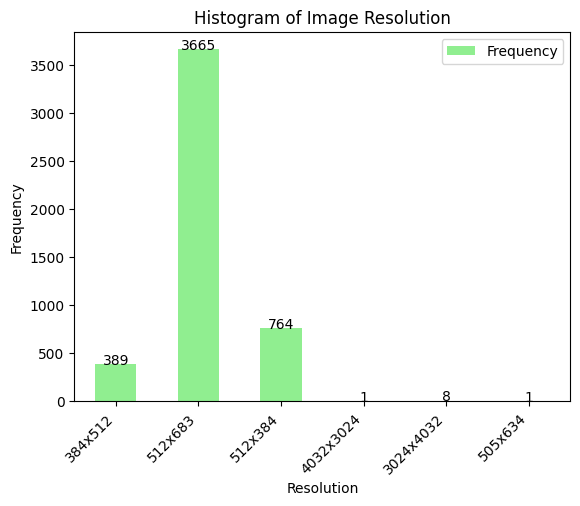

In [ ]:
# plot shape of images

print(df_is_sum)

plt.figure(figsize=(10, 6))
df_is_sum.plot(x='Value', y='Frequency', kind='bar', color='lightgreen')
plt.title('Histogram of Image Resolution')
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(df_is_sum['Frequency']):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
## trash box

trashbox_path = '/content/drive/MyDrive/MIDS Capstone/Datasets/TrashBox_train_set/'

trashbox_folders = os.listdir(trashbox_path)
if '.DS_Store' in trashbox_folders:
    trashbox_folders.remove('.DS_Store')

df_tb = pd.DataFrame(columns = trashbox_folders)

for f in trashbox_folders:
  folder_path = os.path.join(trashbox_path, f)

  if os.path.isdir(folder_path):
    print(f)
    files_in_folder = os.listdir(folder_path)
    num_files = len(files_in_folder)

    df_tb.loc[0, f] = num_files


print(df_tb)

e-waste
paper
plastic
cardboard
glass
metal
medical
  e-waste paper plastic cardboard glass metal medical
0    2406  2156    2135      1930  2022  2068    1585


<ipython-input-143-c749abba988c>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (folder, value) in enumerate(df_tb.sum().iteritems()):


0 2406
1 2156
2 2135
3 1930
4 2022
5 2068
6 1585


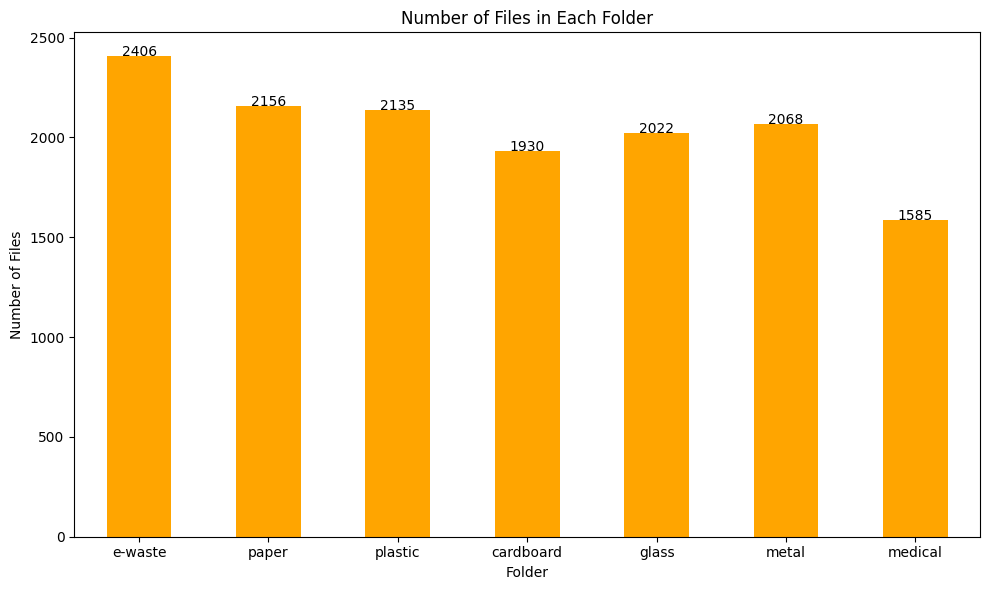

In [ ]:
plt.figure(figsize=(10, 6))
df_tb.sum().plot(kind='bar', color='orange')
plt.title('Number of Files in Each Folder')
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

for i, (folder, value) in enumerate(df_tb.sum().iteritems()):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find format of images

ff_list = []

for f in trashbox_folders:
  folder_path = os.path.join(trashbox_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)

        root, extension = os.path.splitext(full_path)

        # Extract the file format (extension)
        file_format = extension[1:]  # Remove the leading dot

        ff_list.append(file_format)

ff_list = [s.upper() for s in ff_list]

counter = Counter(ff_list)

ff_sum = [(item, count) for item, count in counter.items()]
df_ff_sum = pd.DataFrame(ff_sum, columns=['Value', 'Frequency'])


print(df_ff_sum)

  Value  Frequency
0   JPG      14302


0 14302


<Figure size 1000x600 with 0 Axes>

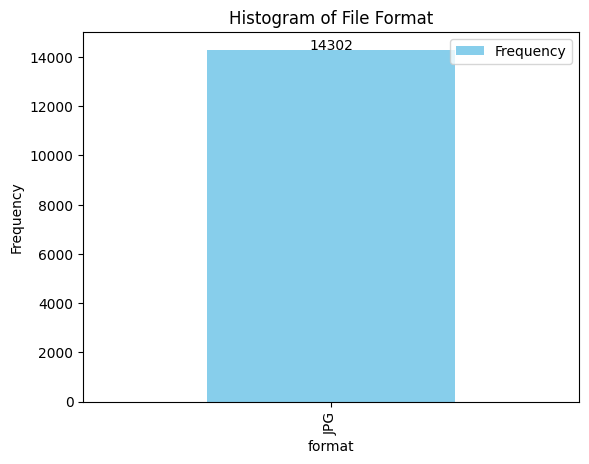

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
df_ff_sum.plot(x='Value', y='Frequency', kind='bar', color='skyblue')
plt.title('Histogram of File Format')
plt.xlabel('format')
plt.ylabel('Frequency')

for i, value in enumerate(df_ff_sum['Frequency']):
    print(i, value)
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()

In [ ]:
# find shape of images

imgshape_list = []

for f in trashbox_folders:
  folder_path = os.path.join(trashbox_path, f)

  if os.path.isdir(folder_path):
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        full_path = os.path.join(folder_path, file)
        im = Image.open(full_path, 'r')

        image_size = str(im.size[0])+ 'x' + str(im.size[1])
        imgshape_list.append(image_size)
        #print(image_size)

counter = Counter(imgshape_list)
is_sum = [(item, count) for item, count in counter.items()]

df_is_sum = pd.DataFrame(is_sum, columns=['Value', 'Frequency'])

UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/MIDS Capstone/Datasets/TrashBox_train_set/paper/paper 2273.jpg'

In [ ]:
fp = '/content/drive/MyDrive/MIDS Capstone/Datasets/TrashBox_train_set/paper/paper 2273.jpg'

img = Image.open(fp)
img.show()


In [ ]:
# plot shape of images

print(df_is_sum)

plt.figure(figsize=(10, 6))
df_is_sum.plot(x='Value', y='Frequency', kind='bar', color='lightgreen')
plt.title('Histogram of Image Resolution')
plt.xlabel('Resolution')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(df_is_sum['Frequency']):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()